<a href="https://colab.research.google.com/github/ElpoderdelComputo/Tutoriales_YouTube/blob/main/Adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADAptive LInear NEuron classifier.
Neuronas lineales adaptativas 

In [ ]:
import numpy as np

# SUSCRÍBETE

class AdalineGD(object):
    """
    Parametros
    ------------
    eta : Tasa de aprendizaje (entre 0.0 and 1.0)
    n_iter : Numero de veces que pasa el conjunto de datos de entrenamiento
    random_state : Semilla del generador de numeros aleatorios

    Attributes
    -----------
    w_ : matriz de pesos despues del ajuste
    cost_ : Valor de la función de costo de suma de cuadrados en cada época
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta  # Taza de aprendizaje
        self.n_iter = n_iter  # Numero de iteraciones
        self.random_state = random_state  #Semilla del generador de numeros aleatorios

    def fit(self, X, y):
        """Ajuste de datos de entrenamiento
        Parameters
        ----------
        X : [n_examples, n_features]; Vectores de entrenamiento donde n_examples es el numero de muestras y 
            n_features es el numero de caracteristicas.
        y : [n_examples]; Etiqueta de muestra

        Returns
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # El método de "activación" no tiene ningún efecto en el código, 
            # ya que es simplemente una función de identidad. Podríamos escribir
            # `output = self.net_input(X)` directamente en su lugar.
            output = self.activation(net_input)
            errors = (y - output)

            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculo de la entrada neta"""
        return np.dot(X, self.w_[1:]) + self.w_[0]   

    def activation(self, X):
        """Calculo de la función de activación"""
        return X

    def predict(self, X):
        """Etiqueta de clase de retorno después del paso unitario"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
      

In [ ]:
import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


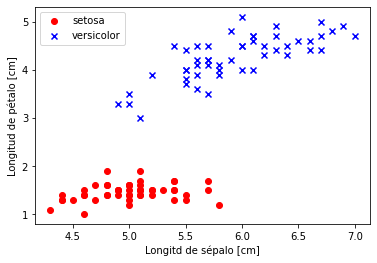

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('Longitd de sépalo [cm]')
plt.ylabel('Longitud de pétalo [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

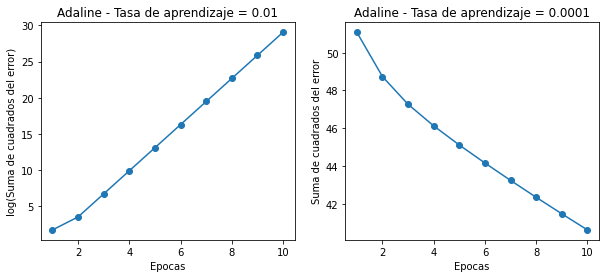

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)

ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epocas')
ax[0].set_ylabel('log(Suma de cuadrados del error)')
ax[0].set_title('Adaline - Tasa de aprendizaje = 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)

ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epocas')
ax[1].set_ylabel('Suma de cuadrados del error')
ax[1].set_title('Adaline - Tasa de aprendizaje = 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

In [ ]:
# Estandarizar los datos
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

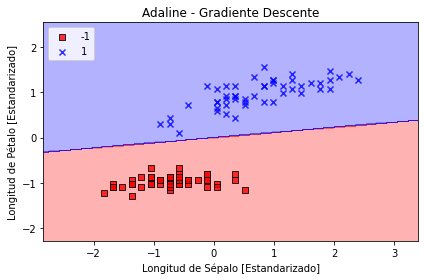

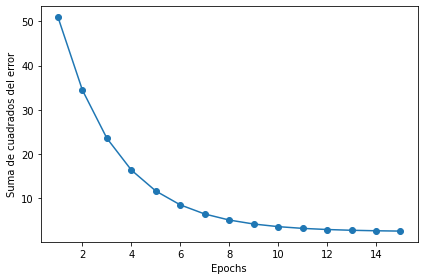

In [ ]:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradiente Descente')
plt.xlabel('Longitud de Sépalo [Estandarizado]')
plt.ylabel('Longitud de Pétalo [Estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Suma de cuadrados del error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()